In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [9]:
# %%%%%%%%%%%%%%%%%  Full Data Frame %%%%%%%%%%%%%%%% #

data = pd.read_csv('zProso_Dat.csv', sep=',', header=0, encoding = "ISO-8859-1")
#pd.set_option('display.max_columns', None)
#print(len(data.columns))

C:\Users\TaraM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (214,218,1797,1813,1826,1828,1830,1831,1832,1833,1834,1835,1836,2560,2642,2659,2683,2689,2697,2708,2717,2720,2722,2741,2853,2857,2858,2860,2861,3436,3531,3550,3574,3580,3588,3608,3609,3611,3613,3632,3748,3753,3755,3756,4428,4448,4472,4478,4486,4507,4510,4512,4534,4624,4635,4648,4652,4657,5659,5661,5662,5681,5705,5719,5819,5821,5823,6030,6035,6036,6037,6038) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# print all colnlames
print(data.columns.values.tolist())

['ID', 'Haartyp', 'Gel', 'Ges1_vorTagen', 'Ges1_AnzahlTage', 'Ges2_vorTagen', 'Ges2_AnzahlTage', 'Ges3_vorTagen', 'Ges3_AnzahlTage', 'AssDat', 'Farbe', 'Kosmetik', 'Langetotal', 'Segmentierung', 'WaschenWoche', 'StundenimFreienWoche', 'StundenimFreienWE', 'Kopfbedeckung', 'Lotion', 'Schwitzen', 'Solarium', 'Sport', 'Verhuetung', 'Einwaage', 'Morphine', 'MAM', 'Hydromorphone', 'Codeine', 'Dihydrocodeine', 'Oxycodone', 'Oxymorphon', 'Fentanyl', 'Pethidin', 'Tapentadol', 'Tilidin', 'Tramadol', 'Dextromethorphan', 'Methadon', 'Buprenorphine', 'Cocaine', 'Benzoylecgonine', 'Cocaethylen', 'Ncocaine', 'Amphetamine', 'Methamphetamine', 'MDMA', 'MDA', 'MDEA', 'Methylphenidate', 'Modafinil', 'Atomoxetin', '2C-B', '4-FA', 'Ketamine', 'Pregabaline', 'Doxylamine', 'Lamotrigine', 'Diphenydramine', 'Levamisol', 'THC', 'CBN', 'CBD', 'Citalopram', 'Duloxetine', 'Fluoxetine', 'Mirtazapine', 'Paroxetine', 'Sertraline', 'Trazodone', 'Venlafaxin', 'Paracetamol', 'Cortisol', 'Cortison', 'Testosterone', 'Alp

In [3]:
#### Take out timeseries with Problems ****
## additionally, sort problems according to Item, such as Problem 1 at T1 is followed by Problem 1 at T2 followed
# by Problem 1 at T3 etc. (for better interpolation!)

Problems = data[['ID','TC_PROBLEM01', 'TC2.2_PROBLEM01', 'TC3.1_PROBLEM01', 'TC4.1_PROBLEM01', 'TC4.2_PROBLEM01', 'TC4.3_PROBLEM01', 'TC5.1_PROBLEM01', 'TC6.1_PROBLEM01', 'TC7.1_PROBLEM01', 
'TC_PROBLEM02', 'TC2.2_PROBLEM02', 'TC3.1_PROBLEM02', 'TC4.1_PROBLEM02', 'TC4.2_PROBLEM02', 'TC4.3_PROBLEM02', 'TC5.1_PROBLEM02', 'TC6.1_PROBLEM02', 'TC7.1_PROBLEM02',
'TC_PROBLEM03', 'TC2.2_PROBLEM03', 'TC3.1_PROBLEM03', 'TC4.1_PROBLEM03', 'TC4.2_PROBLEM03', 'TC4.3_PROBLEM03', 'TC5.1_PROBLEM03', 'TC6.1_PROBLEM03', 'TC7.1_PROBLEM03', 
'TC_PROBLEM04', 'TC2.2_PROBLEM04', 'TC3.1_PROBLEM04', 'TC4.1_PROBLEM04', 'TC4.2_PROBLEM04', 'TC4.3_PROBLEM04', 'TC5.1_PROBLEM04', 'TC6.1_PROBLEM04', 'TC7.1_PROBLEM04', 
'TC_PROBLEM05', 'TC2.2_PROBLEM05', 'TC3.1_PROBLEM05', 'TC4.1_PROBLEM05', 'TC4.2_PROBLEM05', 'TC4.3_PROBLEM05', 'TC5.1_PROBLEM05', 'TC6.1_PROBLEM05', 'TC7.1_PROBLEM05', 
'TC_PROBLEM06', 'TC2.2_PROBLEM06', 'TC3.1_PROBLEM06', 'TC4.1_PROBLEM06', 'TC4.2_PROBLEM06', 'TC4.3_PROBLEM06', 'TC5.1_PROBLEM06', 'TC6.1_PROBLEM06', 'TC7.1_PROBLEM06',
'TC_PROBLEM07', 'TC2.2_PROBLEM07', 'TC3.1_PROBLEM07', 'TC4.1_PROBLEM07', 'TC4.2_PROBLEM07', 'TC4.3_PROBLEM07', 'TC5.1_PROBLEM07', 'TC6.1_PROBLEM07', 'TC7.1_PROBLEM07']]

Problems.set_index('ID', inplace = True) ## sets ID as Index 
#pd.set_option('display.max_columns', None)
#Problems.head()

In [4]:
### transpose "Problems" for interpolation (per row) #### 
# such as NAN at T3 is interpolated from T2 etc. 

ProblemsT = Problems.transpose()

ProblemsT = ProblemsT.interpolate(method='linear', limit_direction='forward', axis=0)
ProblemsT.head()


ID,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10,...,ID994,ID995,ID996,ID997,ID998,ID999,ID1000,ID1001,ID1002,ID1003
TC_PROBLEM01,2.0,NaN,3.0,4.0,2.0,2.0,1.0,3.0,3.0,3.0,...,1.0,3.0,3.00,1.0,NaN,1.0,3.0,2.0,3.0,4.0
TC2.2_PROBLEM01,4.0,NaN,3.0,3.0,1.0,2.0,2.0,3.0,2.0,3.0,...,2.0,4.0,3.00,2.0,NaN,2.0,3.0,1.0,2.0,3.0
TC3.1_PROBLEM01,4.0,NaN,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.00,2.0,NaN,2.0,3.0,2.0,2.0,3.0
TC4.1_PROBLEM01,2.0,NaN,3.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,...,3.0,2.0,2.00,3.0,NaN,3.0,2.0,2.0,2.0,2.0
TC4.2_PROBLEM01,2.0,NaN,4.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,...,3.0,3.0,2.25,2.0,NaN,2.0,3.0,2.0,2.0,3.0


In [5]:
## Backward interpolation for the other missing values:
ProblemsT = ProblemsT.interpolate(method='linear', limit_direction='backward', axis=0)

# Backward transformation:
Problems = ProblemsT.transpose()
display(Problems)

,TC_PROBLEM01,TC2.2_PROBLEM01,TC3.1_PROBLEM01,TC4.1_PROBLEM01,TC4.2_PROBLEM01,TC4.3_PROBLEM01,TC5.1_PROBLEM01,TC6.1_PROBLEM01,TC7.1_PROBLEM01,TC_PROBLEM02,...,TC7.1_PROBLEM06,TC_PROBLEM07,TC2.2_PROBLEM07,TC3.1_PROBLEM07,TC4.1_PROBLEM07,TC4.2_PROBLEM07,TC4.3_PROBLEM07,TC5.1_PROBLEM07,TC6.1_PROBLEM07,TC7.1_PROBLEM07
ID,,,,,,,,,,,,,,,,,,,,,
ID1,2.0,4.0,4.0,2.0,2.0,3.0,3.0,3.000000,2.500000,2.00,...,1.50,1.0,3.00,3.000000,1.000000,1.0,3.00,2.5,2.0,2.0
ID2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.000000,3.125000,3.25,...,1.25,1.5,1.75,2.000000,2.250000,2.5,2.75,3.0,2.0,2.0
ID3,3.0,3.0,3.0,3.0,4.0,3.0,2.0,5.000000,2.000000,3.00,...,2.00,2.0,2.00,2.000000,2.000000,1.0,2.00,3.0,4.0,2.0
ID4,4.0,3.0,2.0,1.0,2.0,3.0,2.0,3.000000,3.000000,3.00,...,1.50,1.0,1.00,2.000000,1.000000,1.0,1.00,2.0,2.0,2.0
ID5,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.666667,2.333333,3.00,...,3.00,3.0,1.00,5.000000,3.000000,2.0,2.00,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID999,1.0,2.0,2.0,3.0,2.0,3.0,1.0,2.000000,2.000000,3.00,...,2.00,1.0,1.00,2.000000,2.000000,3.0,4.00,1.0,2.0,2.0
ID1000,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.000000,3.000000,4.00,...,1.00,4.0,3.00,4.000000,3.000000,4.0,2.00,2.0,3.0,1.0
ID1001,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.000000,3.000000,2.00,...,1.00,1.0,1.00,2.000000,1.000000,1.5,2.00,2.0,3.0,2.0


In [12]:
# substances <- all substances extracted from zProso Dataframe
substances = pd.read_csv('zProso_substances.csv', header=0)

In [13]:
######################
#*** prepare data ***#
######################

# Summed scores inside dataframe substances
substances['Pain_Opioids'] =  substances['Fentanyl']+substances['Pethidin']+substances['Tapentadol']+substances['Tilidin']+substances['Tramadol']+substances['Morphine']+substances['Hydromorphone']+substances['Oxycodone']+substances['Oxymorphon']
substances['Other_Opioids'] = substances['Methadon']+substances['Buprenorphine']+substances['MAM']
substances['Codeine'] = substances['Codeine']+substances['Dihydrocodeine']+substances['Dextromethorphan']
substances['Cocaine'] = substances['Cocaine']+substances['Benzoylecgonine']+substances['Ncocaine']
substances['Cocaine_AlkMix'] = substances['Cocaethylen']
substances['Amphetamine'] = substances['Amphetamine']
substances['Methamphetamine'] = substances['Methamphetamine']
substances['Ecstasy'] = substances['MDMA']+substances['MDA']+substances['MDEA']
substances['other_Psychoactives'] = substances['2C-B']+substances['4-FA']
substances['Ketamine'] = substances['Ketamine']
substances['ADHD_Treat'] = substances['Methylphenidate']+substances['Modafinil']+substances['Atomoxetin']
substances['Epi_Treat'] = substances['Pregabaline']+substances['Lamotrigine']
substances['Antihistamine'] = substances['Diphenydramine']+substances['Doxylamine']
substances['Cannabis'] = substances['THC']+substances['CBD']
substances['Antidepressant'] = substances['Citalopram']+substances['Duloxetine']+substances['Fluoxetine']+substances['Mirtazapine']+substances['Paroxetine']+substances['Sertraline']+substances['Trazodone']+substances['Venlafaxin']
substances['Paracetamol'] = substances['Paracetamol']
substances['Benzodiatephine'] = substances['Alprazolam']+substances['Bromazepam']+substances['Clobazepam']+substances['Clonazepame']+substances['Demoxepame']+substances['Diazepame']+substances['Nordazepame']+substances['Oxazepam']+substances['Temazepame']+substances['Flunitrazepame']+substances['Flurazepame']+substances['7AminoFlunirazepame']+substances['NDesalkylflurazepame']+substances['Lorazepame']+substances['Lormetazepame']+substances['Midazolam']+substances['OHMidazolam']+substances['Nitrazepame']+substances['7AminoNotrazepame']+substances['Phenazepame']+substances['Prazepame']+substances['Tetrazepame']+substances['Triazolame'] 
substances['Seditativa'] = substances['Zaleplon']+substances['Zolpidem']+substances['Zopiclone']
substances['Levamisol'] = substances['Levamisol']

# ExtraData Frames - without summing up columns
data_Opioids_an_Morphines =  substances[['Fentanyl','Pethidin','Tapentadol','Tilidin','Tramadol','Morphine','Hydromorphone','Oxycodone','Oxymorphon','Methadon','Buprenorphine','Codeine','Dihydrocodeine','Dextromethorphan']]
data_Antidepressant = substances[['Citalopram','Duloxetine','Fluoxetine','Mirtazapine','Paroxetine','Sertraline','Trazodone','Venlafaxin']]
data_Seditativa = substances[['Zaleplon','Zolpidem','Zopiclone']]
data_Benzodiazephine = substances[['Alprazolam','Bromazepam','Clobazepam','Clonazepame','Demoxepame','Diazepame','Nordazepame','Oxazepam','Temazepame','Flunitrazepame','Flurazepame','Lorazepame','Lormetazepame','Midazolam','Nitrazepame','Phenazepame','Prazepame','Tetrazepame','Triazolame']] 

# %%%%%%%%%%%% Drug Data %%%%%%%%%%%% <- contains all relevant drugs
Drug_Data = substances[['Cocaine','Cocaine_AlkMix','Amphetamine','Methamphetamine','Ecstasy','other_Psychoactives','Ketamine','Cannabis']]


In [15]:
Drug_Data[(Drug_Data['Cocaine']>0)]

,Cocaine,Cocaine_AlkMix,Amphetamine,Methamphetamine,Ecstasy,other_Psychoactives,Ketamine,Cannabis
2,145.0,0,0,0,0.0,0,0,0
17,642.0,0,0,0,0.0,0,0,473
40,352.0,0,0,0,0.0,0,0,43
43,75.0,0,0,0,80.0,0,0,0
53,71.0,0,0,0,425.0,0,0,69
...,...,...,...,...,...,...,...,...
894,8740.0,1800,0,0,9400.0,0,0,0
907,145.0,0,0,0,840.0,0,0,0
934,82.0,0,0,0,800.0,0,0,74
946,475.0,28,0,0,0.0,0,0,55


In [11]:
# %%%%%%%%%%%%%%%%%  Figure 1: Table with Gender & Hairtype %%%%%%%%%%%%%%%% #

substances.loc[(substances.Haartyp == 'KopfhaareBeinhaare'),'Haartyp']='Kopfhaare'
substances.loc[(substances.Gender == 0.0), 'Gender']='unclear'
substances.loc[(substances.Gender == 1.0), 'Gender']='male'
substances.loc[(substances.Gender == 2.0), 'Gender']='female'

substances.rename(columns={'Haartyp': 'Hairtype'}, inplace=True)

In [ ]:
for col in substances.columns: 
    print(col) 

In [ ]:
HairGen = substances.groupby(['Gender','Hairtype']).size().reset_index(name='count')
HairGen

In [ ]:
print("Gender:", substances['Gender'].isna().sum())
print("Hairtype:", substances['Hairtype'].isna().sum())

In [ ]:
# Missing Values of each relevant column

missings = substances[['Pain_Opioids','Other_Opioids','Codeine','Cocaine','Cocaine_AlkMix','Amphetamine',
                      'Methamphetamine','Ecstasy','other_Psychoactives','Ketamine','ADHD_Treat',
                      'Epi_Treat','Antihistamine','Cannabis','Antidepressant','Paracetamol','Benzodiatephine',
                      'Seditativa','Levamisol']]

missings.isna().sum()

In [ ]:

import plotly.figure_factory as ff

fig =  ff.create_table(HairGen)
fig.update_layout(
    autosize=False,
    width=600,
    height=200,
)
#fig.write_image("table_plotly.png", scale=2)
fig.show()


In [12]:
# %%%%%%%%%%%%%%%%%  Figure 2: Table with amount of Durg and Medicament consumption %%%%%%%%%%%%%%%% #

substances.loc[(substances['Cocaine'] > 1) | (substances['Amphetamine'] > 1) | (substances['Methamphetamine'] > 1) |
          (substances['Ecstasy'] > 1) | (substances['other_Psychoactives'] > 1) | (substances['Ketamine'] > 1) |
          (substances['Cannabis'] > 1), 'Drug cons'] = 'yes'

substances.loc[(substances['Cocaine'] <=  1) & (substances['Amphetamine'] <= 1) & (substances['Methamphetamine'] <= 1) &
          (substances['Ecstasy'] <=  1) & (substances['other_Psychoactives'] <= 1) & (substances['Ketamine'] <= 1) &
          (substances['Cannabis'] <=  1), 'Drug cons'] = 'no'

substances.groupby(['Drug cons']).count()

,ID,Hairtype,Kosmetik,Verhuetung,Morphine,MAM,Hydromorphone,Codeine,Dihydrocodeine,Oxycodone,...,Cocaine_AlkMix,Ecstasy,other_Psychoactives,ADHD_Treat,Epi_Treat,Antihistamine,Cannabis,Antidepressant,Benzodiatephine,Seditativa
Drug cons,,,,,,,,,,,,,,,,,,,,,
no,765,765,765,503,765,765,765,765,765,765,...,765,765,765,765,765,765,765,764,765,765
yes,238,237,238,133,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238


In [13]:
substances.loc[(substances['Antidepressant'] > 1) | (substances['Epi_Treat'] > 1) | (substances['ADHD_Treat'] > 1) |
          (substances['Pain_Opioids'] > 1) | (substances['Other_Opioids'] > 1) | (substances['Codeine'] > 1) |
          (substances['Antihistamine'] > 1) | (substances['Benzodiatephine'] > 1) |
          (substances['Seditativa'] > 1), 'Meds cons'] = 'yes'

substances.loc[(substances['Antidepressant'] <= 1) & (substances['Epi_Treat'] <= 1) & (substances['ADHD_Treat'] <= 1) &
          (substances['Pain_Opioids'] <= 1) & (substances['Other_Opioids'] <= 1) & (substances['Codeine'] <= 1) &
          (substances['Antihistamine'] <= 1) & (substances['Benzodiatephine'] <= 1) &
          (substances['Seditativa'] <= 1), 'Meds cons'] = 'no'

substances.groupby(['Meds cons']).count()

,ID,Hairtype,Kosmetik,Verhuetung,Morphine,MAM,Hydromorphone,Codeine,Dihydrocodeine,Oxycodone,...,Ecstasy,other_Psychoactives,ADHD_Treat,Epi_Treat,Antihistamine,Cannabis,Antidepressant,Benzodiatephine,Seditativa,Drug cons
Meds cons,,,,,,,,,,,,,,,,,,,,,
no,734,734,734,457,734,734,734,734,734,734,...,734,734,734,734,734,734,734,734,734,734
yes,268,267,268,178,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268


In [ ]:
consum=substances.groupby(['Drug cons','Meds cons']).size().reset_index(name='Count')
consum

In [ ]:

import plotly.figure_factory as ff

fig =  ff.create_table(consum)
fig.update_layout(
    autosize=False,
    width=600,
    height=150,
)
#fig.write_image("table_drug_med.png", scale=2)
fig.show()

In [ ]:
# %%%%%%%%%%%%%%%%%  Supplementary Fig 1: Table with amount of Durg and Medicament consumption %%%%%%%%%%%%%%%% #

Genconsum=substances.groupby(['Gender','Drug cons','Meds cons']).size().reset_index(name='Count')
Genconsum

In [ ]:
import plotly.figure_factory as ff

fig =  ff.create_table(Genconsum)
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
)
fig.write_image("SupplmFig1.png", scale=2)
fig.show()

In [18]:
# %%%%%%%%%%%%%%%%%  Create Data Frame Scales %%%%%%%%%%%%%%%% #

Scales = substances[['ID','Gender','Pain_Opioids','Other_Opioids','Codeine','Cocaine','Cocaine_AlkMix','Amphetamine',
                      'Methamphetamine','Ecstasy','other_Psychoactives','Ketamine','ADHD_Treat',
                     'Epi_Treat','Antihistamine','Cannabis','Antidepressant','Paracetamol','Benzodiatephine',
                     'Seditativa','Levamisol','Drug cons','Meds cons']]
###scales_to_join = data[['ID', 'honesty.pca', 'trust.pca', 'cooperation.pca', 'fairness.pca','own_dice_cast','trust_yes_no','trust_belief','trust_return','pgg_contribution','dg_take','ug_take','ug_lowest_accept','games_fun','games_understanding','problem', 'problem_TG', 'problem_DG', 'problem_PGG', 'problem_UG']]

SCALES = Scales.set_index('ID').join(Problems)

In [19]:
for col in SCALES.columns: 
    print(col) 

Gender
Pain_Opioids
Other_Opioids
Codeine
Cocaine
Cocaine_AlkMix
Amphetamine
Methamphetamine
Ecstasy
other_Psychoactives
Ketamine
ADHD_Treat
Epi_Treat
Antihistamine
Cannabis
Antidepressant
Paracetamol
Benzodiatephine
Seditativa
Levamisol
Drug cons
Meds cons
TC_PROBLEM01
TC2.2_PROBLEM01
TC3.1_PROBLEM01
TC4.1_PROBLEM01
TC4.2_PROBLEM01
TC4.3_PROBLEM01
TC5.1_PROBLEM01
TC6.1_PROBLEM01
TC7.1_PROBLEM01
TC_PROBLEM02
TC2.2_PROBLEM02
TC3.1_PROBLEM02
TC4.1_PROBLEM02
TC4.2_PROBLEM02
TC4.3_PROBLEM02
TC5.1_PROBLEM02
TC6.1_PROBLEM02
TC7.1_PROBLEM02
TC_PROBLEM03
TC2.2_PROBLEM03
TC3.1_PROBLEM03
TC4.1_PROBLEM03
TC4.2_PROBLEM03
TC4.3_PROBLEM03
TC5.1_PROBLEM03
TC6.1_PROBLEM03
TC7.1_PROBLEM03
TC_PROBLEM04
TC2.2_PROBLEM04
TC3.1_PROBLEM04
TC4.1_PROBLEM04
TC4.2_PROBLEM04
TC4.3_PROBLEM04
TC5.1_PROBLEM04
TC6.1_PROBLEM04
TC7.1_PROBLEM04
TC_PROBLEM05
TC2.2_PROBLEM05
TC3.1_PROBLEM05
TC4.1_PROBLEM05
TC4.2_PROBLEM05
TC4.3_PROBLEM05
TC5.1_PROBLEM05
TC6.1_PROBLEM05
TC7.1_PROBLEM05
TC_PROBLEM06
TC2.2_PROBLEM06
TC3.1_PR

In [20]:
### %%%%%%%%%%%%%%%%%  Saves Dataframe Scales %%%%%%%%%%%%%%%% #
#SCALES.to_csv('Scales.csv', header=True, index=True) 

In [21]:
# %%%%%%%%%%%%%%%%%  Figure 2: Amount of substances by drug categories %%%%%%%%%%%%%%%% #

## 1. prepare data
Yes_Pain = data_Opioids_an_Morphines[(data_Opioids_an_Morphines > 1).any(axis=1)]
Yes_Pain = Yes_Pain.replace(0.0, 'NaN', regex=True)
Yes_Pain = Yes_Pain.replace(0, 'NaN', regex=True)

Yes_Antid = data_Antidepressant[(data_Antidepressant > 1).any(axis=1)]
Yes_Antid = Yes_Antid.replace(0.0, 'NaN', regex=True)
Yes_Antid = Yes_Antid.replace(0, 'NaN', regex=True)

Yes_Seditat = data_Seditativa[(data_Seditativa > 1).any(axis=1)]
Yes_Seditat = Yes_Seditat.replace([0,0.0], 'NaN', regex=True)

Yes_Benzo = data_Benzodiazephine[(data_Benzodiazephine > 1).any(axis=1)]
Yes_Benzo = Yes_Benzo.replace([0,0.0], 'NaN', regex=True)

Drug_Data_drop = Drug_Data.drop(['Cocaine_AlkMix'], axis=1)
Yes_Drugs = Drug_Data_drop[(Drug_Data_drop > 1).any(axis=1)]
Yes_Drugs = Yes_Drugs.replace([0,0.0], 'NaN', regex=True)

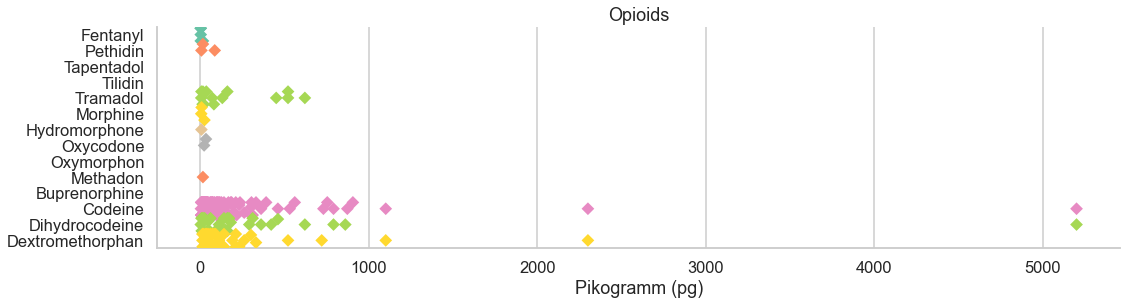

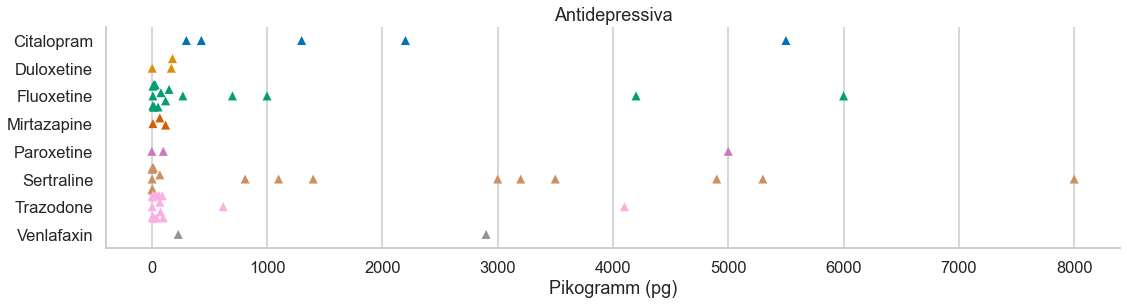

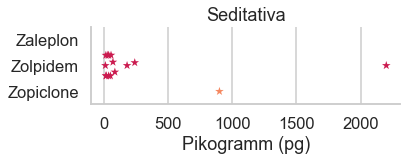

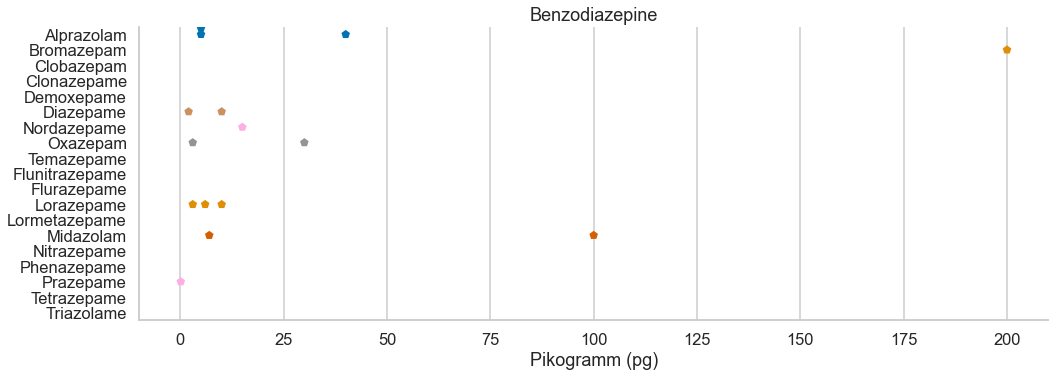

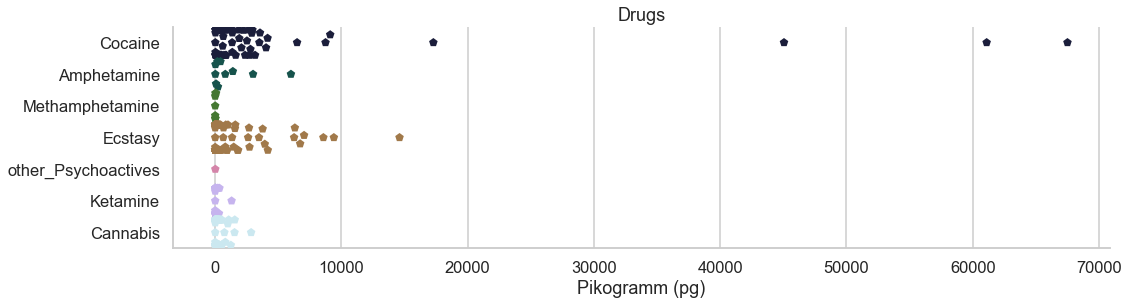

In [22]:
sns.set_context("talk")
sns.set_style("whitegrid") 

PainOp = sns.catplot(kind='swarm', data=Yes_Pain, height=4, aspect=4, palette="Set2", orient='h', s=9, marker='D')
PainOp.set_axis_labels('Pikogramm ''(pg)','')
plt.title("Opioids")
plt.savefig('Opopods.png', dpi=300)

Antis = sns.catplot(kind='swarm', data=Yes_Antid, height=4, aspect=4, palette="colorblind", orient='h', s=9, marker='^')
Antis.set_axis_labels('Pikogramm ''(pg)','')
plt.title("Antidepressiva")
plt.savefig('Antidep.png', dpi=300)

Sedis = sns.catplot(kind='swarm', data=Yes_Seditat, height=2, aspect=3, palette="rocket", orient='h', s=9, marker='*')
Sedis.set_axis_labels('Pikogramm ''(pg)','')
plt.title("Seditativa")
plt.savefig('Sedit.png', dpi=300)

Benzos = sns.catplot(kind='swarm', data=Yes_Benzo, height=5, aspect=3, palette="colorblind", orient='h', s=9, marker='p')
Benzos.set_axis_labels('Pikogramm ''(pg)','')
plt.title("Benzodiazepine")
plt.savefig('Benzo.png', dpi=300)

Drugs = sns.catplot(kind='swarm', data=Yes_Drugs, height=4, aspect=4, palette="cubehelix", orient='h', s=9, marker='p')
Drugs.set_axis_labels('Pikogramm ''(pg)','')
plt.title("Drugs")
plt.savefig('Drugs.png', dpi=300)

<ipython-input-23-f973e0db84da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drug_Data['Ecstasy'] = Drug_Data.loc[:,'Ecstasy']+Drug_Data.loc[:,'other_Psychoactives']
<ipython-input-23-f973e0db84da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drug_Data['Amphetamine'] = Drug_Data.loc[:,'Amphetamine']+Drug_Data.loc[:,'Methamphetamine']


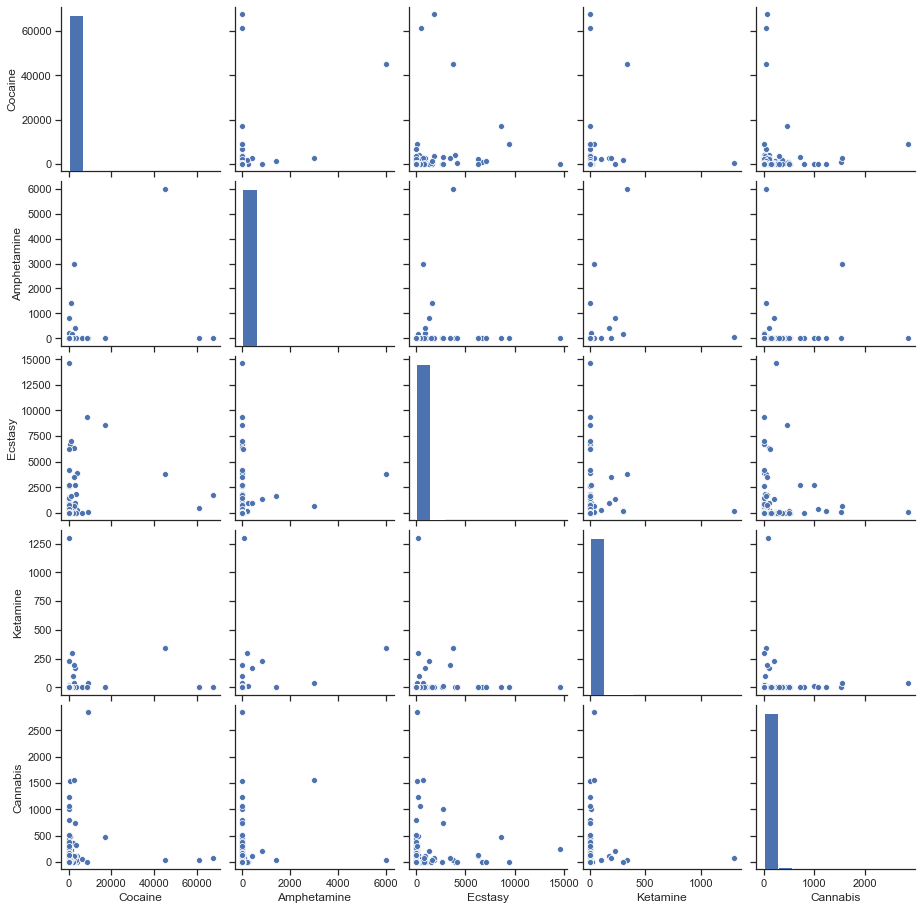

In [23]:
# %%%%%%%%%%%%%%%%%  Supplementary Fig 2: Intercorrelation of amount of consumption %%%%%%%%%%%%%%%% #

sns.set(style='ticks')
Drug_Data['Ecstasy'] = Drug_Data.loc[:,'Ecstasy']+Drug_Data.loc[:,'other_Psychoactives']
Drug_Data['Amphetamine'] = Drug_Data.loc[:,'Amphetamine']+Drug_Data.loc[:,'Methamphetamine']
Drugs = Drug_Data[['Cocaine','Amphetamine','Ecstasy','Ketamine','Cannabis']]

sns.pairplot(Drugs)

In [24]:
### check amount of co-consumption between drugs

Drugs.columns[(Drugs > 1).any(axis=0)]

Drugs_dict = dict(sorted(Drugs.groupby(Drugs.index)))

for k, v in Drugs_dict.items():               # k: name of index, v: is a df
    check = v.columns[(v > 1).any()]
    if len(check) > 0:
       print(k, check.to_list())


0 ['Ecstasy', 'Cannabis']
2 ['Cocaine']
13 ['Ecstasy']
17 ['Cocaine', 'Cannabis']
28 ['Cannabis']
34 ['Ecstasy', 'Cannabis']
36 ['Ecstasy']
40 ['Cocaine', 'Cannabis']
43 ['Cocaine', 'Ecstasy']
45 ['Cannabis']
53 ['Cocaine', 'Ecstasy', 'Cannabis']
54 ['Ecstasy']
56 ['Cannabis']
57 ['Cannabis']
63 ['Cocaine', 'Ecstasy']
66 ['Ecstasy', 'Cannabis']
69 ['Ecstasy']
74 ['Cocaine', 'Ecstasy', 'Cannabis']
75 ['Cannabis']
85 ['Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis']
86 ['Cocaine', 'Ecstasy', 'Ketamine']
100 ['Ecstasy']
106 ['Ecstasy', 'Cannabis']
112 ['Cannabis']
115 ['Cocaine', 'Ecstasy', 'Cannabis']
117 ['Ecstasy', 'Cannabis']
124 ['Cocaine', 'Ecstasy', 'Cannabis']
128 ['Cocaine', 'Ecstasy']
132 ['Cocaine', 'Amphetamine', 'Cannabis']
134 ['Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis']
135 ['Ketamine']
138 ['Ecstasy']
143 ['Cocaine', 'Ecstasy']
146 ['Ecstasy']
154 ['Cannabis']
158 ['Cannabis']
162 ['Cannabis']
165 ['Ecstasy', 'Cannabis']
169 ['Ecstasy']
173 ['Ecstasy']
181 ['

In [25]:
Drugs.columns[(Drugs > 1).any(axis=0)]

Drugs_dict = dict(sorted(Drugs.groupby(Drugs.index)))

for k, v in Drugs_dict.items():               # k: name of index, v: is a df
    check = v.columns[(v > 1).any()]
    if len(check) > 0:
     print(check.to_list())


['Ecstasy', 'Cannabis']
['Cocaine']
['Ecstasy']
['Cocaine', 'Cannabis']
['Cannabis']
['Ecstasy', 'Cannabis']
['Ecstasy']
['Cocaine', 'Cannabis']
['Cocaine', 'Ecstasy']
['Cannabis']
['Cocaine', 'Ecstasy', 'Cannabis']
['Ecstasy']
['Cannabis']
['Cannabis']
['Cocaine', 'Ecstasy']
['Ecstasy', 'Cannabis']
['Ecstasy']
['Cocaine', 'Ecstasy', 'Cannabis']
['Cannabis']
['Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis']
['Cocaine', 'Ecstasy', 'Ketamine']
['Ecstasy']
['Ecstasy', 'Cannabis']
['Cannabis']
['Cocaine', 'Ecstasy', 'Cannabis']
['Ecstasy', 'Cannabis']
['Cocaine', 'Ecstasy', 'Cannabis']
['Cocaine', 'Ecstasy']
['Cocaine', 'Amphetamine', 'Cannabis']
['Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis']
['Ketamine']
['Ecstasy']
['Cocaine', 'Ecstasy']
['Ecstasy']
['Cannabis']
['Cannabis']
['Cannabis']
['Ecstasy', 'Cannabis']
['Ecstasy']
['Ecstasy']
['Ecstasy', 'Cannabis']
['Ecstasy', 'Cannabis']
['Cocaine', 'Ecstasy']
['Cannabis']
['Cocaine', 'Ecstasy', 'Ketamine']
['Cannabis']
['Ecstasy',

In [26]:
DRUGSSSSS = [[('Ecstasy', 'Cannabis')],['Cocaine'],['Ecstasy'],[('Cocaine', 'Cannabis')],['Cannabis'],[('Ecstasy', 'Cannabis')],
['Ecstasy'],[('Cocaine', 'Cannabis')],[('Cocaine', 'Ecstasy')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],['Ecstasy'],
['Cannabis'],['Cannabis'],[('Cocaine', 'Ecstasy')],[('Ecstasy', 'Cannabis')],['Ecstasy'],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Cannabis'],[('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis')],[('Cocaine', 'Ecstasy', 'Ketamine')],['Ecstasy'],[('Ecstasy', 'Cannabis')],
['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy')],
[('Cocaine', 'Cannabis')],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],['Ketamine'],['Ecstasy'],
[('Cocaine', 'Ecstasy')],['Ecstasy'],['Cannabis'],['Cannabis'],['Cannabis'],[('Ecstasy', 'Cannabis')],['Ecstasy'],['Ecstasy'],
[('Ecstasy', 'Cannabis')],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Ketamine')],
['Cannabis'],[('Ecstasy', 'Cannabis')],['Ecstasy'],['Cocaine'],['Cannabis'],[('Cocaine', 'Ecstasy')],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Ecstasy'],['Cocaine'],[('Ecstasy', 'Ketamine')],['Ecstasy'],['Cannabis'],['Cocaine'],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Cannabis'],[('Cocaine', 'Cannabis')],['Cannabis'],['Cocaine'],['Cannabis'],['Cocaine'],['Cannabis'],[('Cocaine', 'Ecstasy')],
['Ecstasy'],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine')],['Cocaine'],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],
[('Cocaine', 'Ecstasy', 'Cannabis')],['Cannabis'],['Cannabis'],['Cocaine'],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Cocaine'],['Cannabis'],['Ecstasy'],[('Cocaine', 'Ecstasy', 'Cannabis')],['Cocaine'],[('Ecstasy', 'Cannabis')],['Cannabis'],
['Cannabis'],['Ecstasy'],['Ecstasy'],[('Cocaine', 'Ecstasy')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],['Ecstasy'],
['Cannabis'],['Cocaine'],['Ecstasy'],[('Amphetamine', 'Ecstasy', 'Ketamine')],['Ecstasy'],['Cannabis'],['Cannabis'],
['Ecstasy'],['Cocaine'],['Cocaine'],[('Cocaine', 'Ecstasy', 'Cannabis')],['Cannabis'],['Ecstasy'],['Cannabis'],[('Cocaine', 'Cannabis')],
['Cocaine'],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis')],['Cocaine'],['Cocaine'],
[('Ecstasy', 'Cannabis')],['Ecstasy'],[('Ecstasy', 'Ketamine', 'Cannabis')],['Cocaine'],['Ecstasy'],['Ecstasy'],['Cannabis'],
['Cannabis'],['Cocaine'],['Cannabis'],['Ecstasy'],['Cannabis'],['Cocaine'],['Cocaine'],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Cannabis'],['Cannabis'],['Cocaine'],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy', 'Cannabis')],['Cocaine'],[('Ecstasy', 'Cannabis')],
['Ecstasy'],[('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis')],[('Cocaine', 'Ecstasy')],[('Cocaine', 'Ecstasy')],['Cocaine'],
['Cocaine'],['Ecstasy'],[('Cocaine', 'Ketamine')],['Cannabis'],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],
['Ecstasy'],['Cocaine'],['Cocaine'],['Ecstasy'],[('Ecstasy', 'Ketamine', 'Cannabis')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis')],
['Cannabis'],['Cannabis'],['Ecstasy'],[('Cocaine', 'Ecstasy')],[('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis')],[('Ecstasy', 'Cannabis')],
[('Cocaine', 'Cannabis')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],
['Cannabis'],['Cannabis'],['Cannabis'],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine')],[('Cocaine', 'Ecstasy')],
['Cannabis'],[('Cocaine', 'Cannabis')],['Cocaine'],['Cocaine'],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Cocaine', 'Cannabis')],
['Ecstasy'],['Cannabis'],['Cannabis'],['Cannabis'],['Cannabis'],['Cannabis'],[('Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],
[('Cocaine', 'Ecstasy')],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],['Cannabis'],['Ecstasy'],['Cannabis'],['Ecstasy'],
['Cannabis'],['Ecstasy'],[('Cocaine', 'Ecstasy', 'Cannabis')],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Cannabis')],
[('Cocaine', 'Cannabis')],[('Cocaine', 'Cannabis')],['Cannabis'],['Cocaine'],['Ecstasy'],['Cocaine'],[('Cocaine', 'Ecstasy')],
[('Ecstasy', 'Cannabis')],[('Cocaine', 'Ecstasy')],['Ecstasy'],[('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis')],
['Cannabis'],[('Cocaine', 'Cannabis')],['Cannabis'],['Cannabis'],['Cannabis'],[('Ecstasy', 'Ketamine', 'Cannabis')],
['Ecstasy'],['Cannabis'],['Cannabis'],['Ecstasy'],[('Cocaine', 'Ecstasy')],['Cannabis'],['Ketamine'],[('Cocaine', 'Ecstasy')],
['Cannabis'],['Ecstasy'],[('Ecstasy', 'Cannabis')],['Ecstasy'],['Cannabis'],[('Cocaine', 'Ecstasy', 'Cannabis')],
['Cannabis'],[('Ecstasy', 'Cannabis')],[('Cocaine', 'Cannabis')],[('Ecstasy', 'Cannabis')],[('Ecstasy', 'Cannabis')],
[('Ecstasy', 'Cannabis')],['Cannabis'],[('Cocaine', 'Ecstasy')],['Cannabis'],['Cannabis'],[('Ecstasy', 'Cannabis')],
['Cannabis'],['Cannabis']]

In [27]:
import collections  
Output = collections.defaultdict(int) 

for elem in DRUGSSSSS: 
      Output[elem[0]] += 1
display(Output)


defaultdict(int,
            {('Ecstasy', 'Cannabis'): 23,
             'Cocaine': 30,
             'Ecstasy': 40,
             ('Cocaine', 'Cannabis'): 12,
             'Cannabis': 69,
             ('Cocaine', 'Ecstasy'): 18,
             ('Cocaine', 'Ecstasy', 'Cannabis'): 19,
             ('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5,
             ('Cocaine', 'Ecstasy', 'Ketamine'): 2,
             ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5,
             'Ketamine': 2,
             ('Ecstasy', 'Ketamine'): 1,
             ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine'): 2,
             ('Amphetamine', 'Ecstasy', 'Ketamine'): 1,
             ('Ecstasy', 'Ketamine', 'Cannabis'): 3,
             ('Cocaine', 'Ketamine'): 1,
             ('Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 1,
             ('Cocaine', 'Amphetamine', 'Ecstasy', 'Cannabis'): 1})

In [28]:
############some additional helpful code; don't use !!!!

DrugOccurs = {('Ecstasy', 'Cannabis'): 23, 'Cocaine': 30, 'Ecstasy': 40, ('Cocaine', 'Cannabis'): 12, 'Cannabis': 69, ('Cocaine', 'Ecstasy'): 18, ('Cocaine', 'Ecstasy', 'Cannabis'): 19, ('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5, ('Cocaine', 'Ecstasy', 'Ketamine'): 2, ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5, 'Ketamine': 2, ('Ecstasy', 'Ketamine'): 1, ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine'): 2, ('Amphetamine', 'Ecstasy', 'Ketamine'): 1, ('Ecstasy', 'Ketamine', 'Cannabis'): 3, ('Cocaine', 'Ketamine'): 1, ('Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 1, ('Cocaine', 'Amphetamine', 'Ecstasy', 'Cannabis'): 1}
display(DrugOccurs)


{('Ecstasy', 'Cannabis'): 23,
 'Cocaine': 30,
 'Ecstasy': 40,
 ('Cocaine', 'Cannabis'): 12,
 'Cannabis': 69,
 ('Cocaine', 'Ecstasy'): 18,
 ('Cocaine', 'Ecstasy', 'Cannabis'): 19,
 ('Cocaine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5,
 ('Cocaine', 'Ecstasy', 'Ketamine'): 2,
 ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 5,
 'Ketamine': 2,
 ('Ecstasy', 'Ketamine'): 1,
 ('Cocaine', 'Amphetamine', 'Ecstasy', 'Ketamine'): 2,
 ('Amphetamine', 'Ecstasy', 'Ketamine'): 1,
 ('Ecstasy', 'Ketamine', 'Cannabis'): 3,
 ('Cocaine', 'Ketamine'): 1,
 ('Amphetamine', 'Ecstasy', 'Ketamine', 'Cannabis'): 1,
 ('Cocaine', 'Amphetamine', 'Ecstasy', 'Cannabis'): 1}

In [ ]:
############some additional helpful code; don't use !!!!

#print(SUBSTANCES.columns)
cols = SUBSTANCES.columns[SUBSTANCES.dtypes.eq('object')]
SUBSTANCES[cols] = SUBSTANCES[cols].apply(pd.to_numeric, errors='coerce', axis=1)
SUBSTANCES = SUBSTANCES.apply(pd.to_numeric, errors="ignore")
SUBSTANCES.astype(int, errors='raise')